Lab_6

Hello World of Machine Learning The best small project to start with on a new tool is the classification of iris flowers (e.g. the iris dataset).

Attributes are numeric so you have to figure out how to load and handle data. It is a classification problem, allowing you to practice with perhaps an easier type of supervised learning algorithm. It is a multi-class classification problem (multi-nominal) that may require some specialized handling. It only has 4 attributes and 150 rows, meaning it is small and easily fits into memory (and a screen or A4 page). All of the numeric attributes are in the same units and the same scale, not requiring any special scaling or transforms to get started.

To do Installing the Python and SciPy platform. Loading the dataset. Summarizing the dataset. Dimensions of the dataset. Peek at the data itself. Statistical summary of all attributes. Breakdown of the data by the class variable.

Visualizing the dataset. Univariate plots to better understand each attribute. Multivariate plots to better understand the relationships between attributes.

Evaluating some algorithms. Separate out a validation dataset. Set-up the test harness to use 10-fold cross validation. Build multiple different models to predict species from flower measurements Select the best model. test 6 different algorithms: Logistic Regression (LR) Linear Discriminant Analysis (LDA) K-Nearest Neighbors (KNN). Classification and Regression Trees (CART). Gaussian Naive Bayes (NB). Support Vector Machines (SVM).

In [16]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [17]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (150, 5)


In [18]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [19]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [20]:
print(df['species'].value_counts())

species
0    50
1    50
2    50
Name: count, dtype: int64


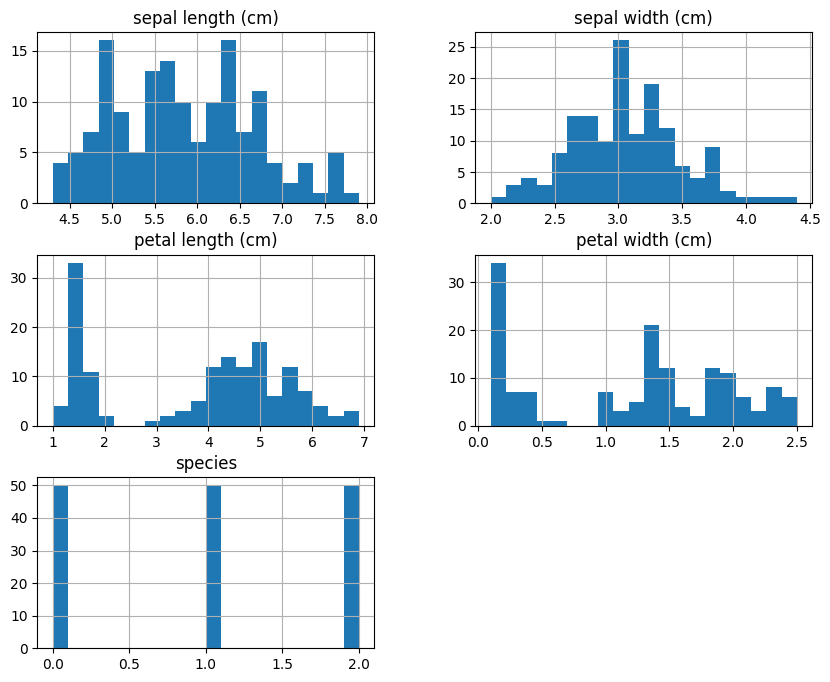

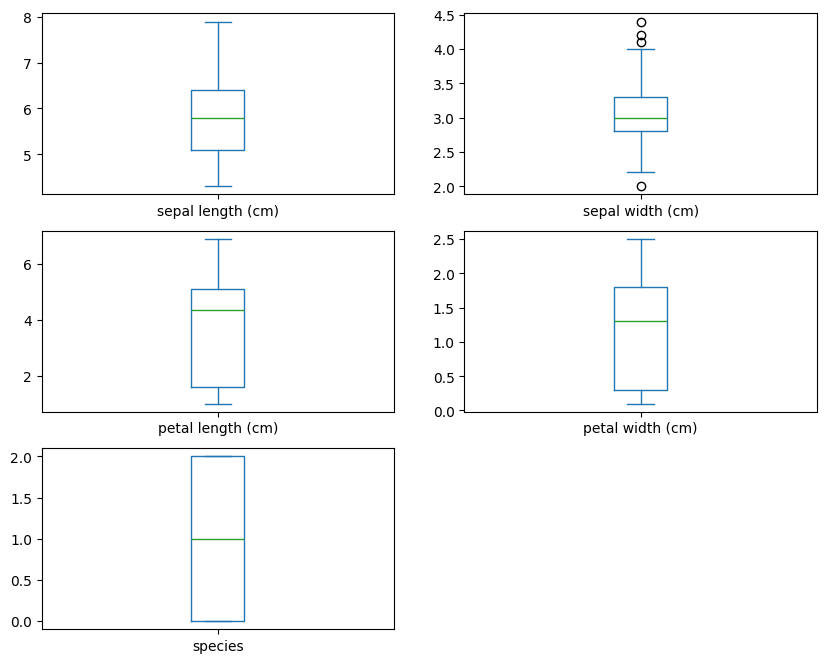

In [21]:
# Histograms (excluding the target variable)
df.hist(bins=20, figsize=(10, 8))
plt.show()

# Adjust layout to fit all columns
df.plot(kind='box', subplots=True, layout=(3, 2), sharex=False, sharey=False, figsize=(10, 8))
plt.show()


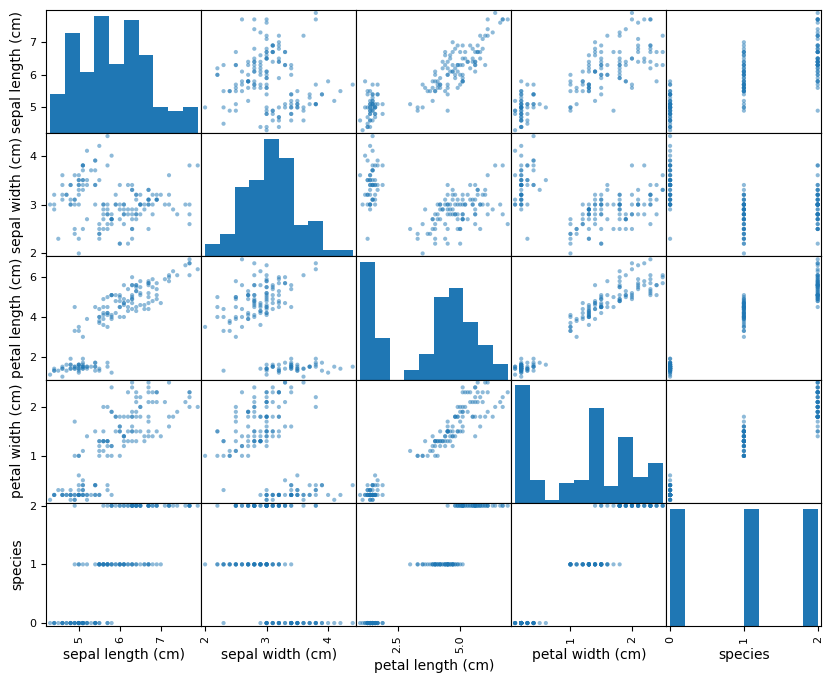

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(10,8))
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['species'].values

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1)


In [24]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, random_state=1, shuffle=True)

In [25]:

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model
results = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append((name, cv_results.mean(), cv_results.std()))
    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")

LR: 0.9666666666666666 (0.04082482904638632)
LDA: 0.975 (0.03818813079129868)
KNN: 0.9583333333333333 (0.041666666666666685)
CART: 0.9583333333333333 (0.041666666666666685)
NB: 0.9499999999999998 (0.04082482904638632)
SVM: 0.9666666666666666 (0.04082482904638632)


In [26]:
model=SVC()
model.fit(X_train,y_train)
predictions=model.predict(X_validation)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f"Accuracy: {accuracy_score(y_validation,predictions)}")
print(confusion_matrix(y_validation,predictions))
print(classification_report(y_validation,predictions))

Accuracy: 0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

